In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
distill = pd.read_csv('06_cv_bm_train_distill_models.csv')
train = pd.read_csv('07_cv_train_models.csv')

In [3]:
drop_cols = ['subsample_frac', 'seed', 'save_dir', 'binary_mapper_frac', 'gpu', 'use_cache', 'cat_mappings', 'task_type', 'save_dir_unique', 'n_epochs',
             'size_interactions', 'post_max_features', 'post_interaction', 'pre_max_features', 'pre_interaction', 'binary_mapper_bit']

In [4]:
distill = distill.drop(columns = drop_cols)
train = train.drop(columns = drop_cols)

In [5]:
models = distill.copy().drop(columns=['distiller_kfold_val_r2','distiller_avg_kfold_val_r2', 'distiller_r2_score_train_true', 'distiller_r2_score_val_true', 
                                          'distiller_r2_score_train_teacher', 'distiller_r2_score_val_teacher', 'distiller_name'])
models = models.rename(columns={'teacher_avg_kfold_val_r2': 'avg_kfold_val_r2', 'teacher_kfold_val_r2':'kfold_val_r2', 
                                        'teacher_r2_score_train_true':'train_r2', 'teacher_r2_score_val_true':'val_r2'})
models.loc[:, 'distiller_name'] = 'None'

In [6]:
distillers = distill.copy().drop(columns=['teacher_kfold_val_r2','teacher_avg_kfold_val_r2', 'teacher_r2_score_train_true', 'teacher_r2_score_val_true', 
                                          'distiller_r2_score_train_teacher', 'distiller_r2_score_val_teacher'])
distillers = distillers.rename(columns={'distiller_avg_kfold_val_r2': 'avg_kfold_val_r2', 'distiller_kfold_val_r2':'kfold_val_r2', 
                                        'distiller_r2_score_train_true':'train_r2', 'distiller_r2_score_val_true':'val_r2'})

In [7]:
train = train.rename(columns={'teacher_avg_kfold_val_r2': 'avg_kfold_val_r2', 'teacher_kfold_val_r2':'kfold_val_r2', 
                                        'teacher_r2_score_train_true':'train_r2', 'teacher_r2_score_val_true':'val_r2'})
train.loc[:, 'distiller_name'] = 'None'

In [8]:
results = pd.concat([distillers, models, train], axis = 0)
results

,dataset_name,model_name,distiller_name,binary_mapper_name,binary_mapper_depth,max_depth,max_features,max_rules,max_trees,avg_kfold_val_r2,kfold_val_r2,train_r2,val_r2
0,miami_housing,rf_plus,figs,gmm_binary_mapper,2,5,1.00,60,30,0.783519,"[0.7935936177324846, 0.7785769234546562, 0.778...",0.800242,0.751060
1,concrete,rf_plus,ft_distill,dt_binary_mapper,2,4,1.00,60,30,0.652333,"[0.6697959203802811, 0.6426053134667642, 0.644...",0.763106,0.773645
2,cpu_act,random_forest,figs,dt_binary_mapper,3,4,1.00,60,30,0.882486,"[0.8495969381096802, 0.9185654694145868, 0.879...",0.910823,0.900083
3,ca_housing,rf_plus,figs,gmm_binary_mapper,2,5,1.00,60,30,0.602343,"[0.5933728428069511, 0.5996862980375848, 0.613...",0.609230,0.603426
4,abalone,random_forest,ft_distill,dt_binary_mapper,3,4,0.75,60,30,0.367042,"[0.3254923381490056, 0.3665016957980639, 0.409...",0.411421,0.391950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,concrete,ft_distill,None,dt_binary_mapper,2,4,1.00,60,30,0.690408,"[0.66771793385508, 0.6577942685690668, 0.74571...",0.786607,0.811876
86,abalone,ft_distill,None,dt_binary_mapper,2,4,1.00,60,30,0.372679,"[0.3554607402091743, 0.3566562682983969, 0.405...",0.407586,0.375404
87,cpu_act,ft_distill,None,dt_binary_mapper,2,4,1.00,60,30,0.939112,"[0.9208508900026702, 0.9537978876394451, 0.942...",0.959264,0.948353
88,airfoil,ft_distill,None,gmm_binary_mapper,2,4,1.00,60,30,0.549698,"[0.5054820310749297, 0.6383697344246079, 0.505...",0.700653,0.643415


In [10]:
results['diff_r2'] = results['val_r2'] - results['train_r2']
results = results.sort_values('diff_r2', ascending=False)
results['diff_r2_rank'] = np.arange(1, results.shape[0]+1)

ValueError: 'binary_mapper_name' is not a valid color value.

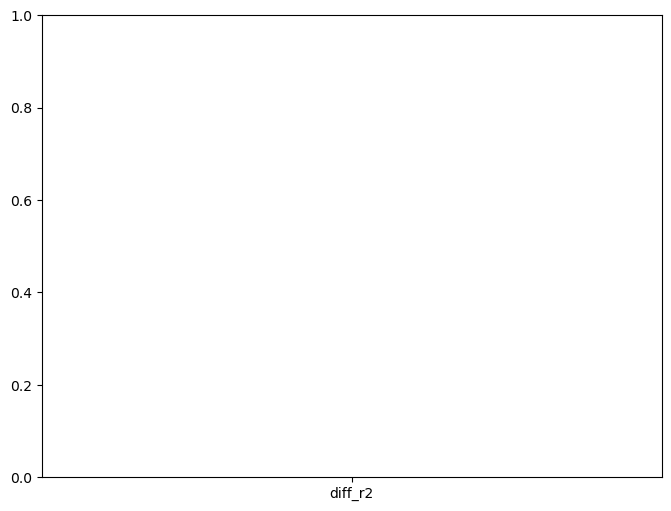

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_histograms(df, column, bins=10, alpha=0.5, colors=None, figsize=(8, 6)):
    plt.figure(figsize=figsize)

    plt.hist('diff_r2', bins=bins, color = 'binary_mapper_name',legend='binary_mapper_name', alpha=alpha, kde=False)

    plt.title(f'Histograms of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    #plt.legend(title = 'binary_mapper_name')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming dfs is a list of dataframes you want to plot
dfs = [(results[results['dataset_name'] == dn], dn) for dn in results['dataset_name'].unique()]

for i, (df, n) in enumerate(dfs):
    plot_histograms(df,n, bins=20, alpha=0.5)


In [ ]:
for dn in results['dataset_name'].unique():
    sns.histplot(results[results['dataset_name'] == dn]['diff_r2'])

In [ ]:
results.groupby('dataset_name').apply(lambda sdf: sdf['diff_r2_rank'].mean())

In [ ]:
m_h = results[results['dataset_name'] == 'miami_housing'].groupby(['model_name', 'distiller_name', 'binary_mapper_name']).apply(lambda sdf: sdf.sort_values(by='val_r2', ascending=False).iloc[0,:])#.reset_index()

In [ ]:
m_h

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_histogram_for_dataset(df, dataset_name, title=''):
    # Set the aesthetics for the plots
    sns.set_context("talk", font_scale=5)
    sns.set(style="whitegrid")

    # Create a catplot for model_name and distiller_name
    sns.set(font_scale=1.25)
    g = sns.catplot(
        data=df,
        x='model_name',
        y='val_r2',
        hue='distiller+binary_mapper',
        kind='bar',
        height=6,
        aspect=2,
    )
    
    # Set the title and labels
    g.fig.suptitle(f'Average Validation R2 Scores by BM, Model, and Distiller Combination ({dataset_name})', fontsize=25)
    g.set_axis_labels("Model Name", "Validation R2 Score", fontsize=25)
    g._legend.set_title('Distiller Name')
    sns.move_legend(g, bbox_to_anchor=(1,0.5), loc="center left", markerscale=5, title="distiller+bm combo")
    
    # Adjust the layout
    plt.yticks(ticks=[0, 0.5, 1.0])
    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    g.savefig(f'plots/{dataset_name}_val_r2.png', bbox_inches='tight')
#hue=df[['distiller_name', 'binary_mapper_name']].apply(tuple, axis =1)

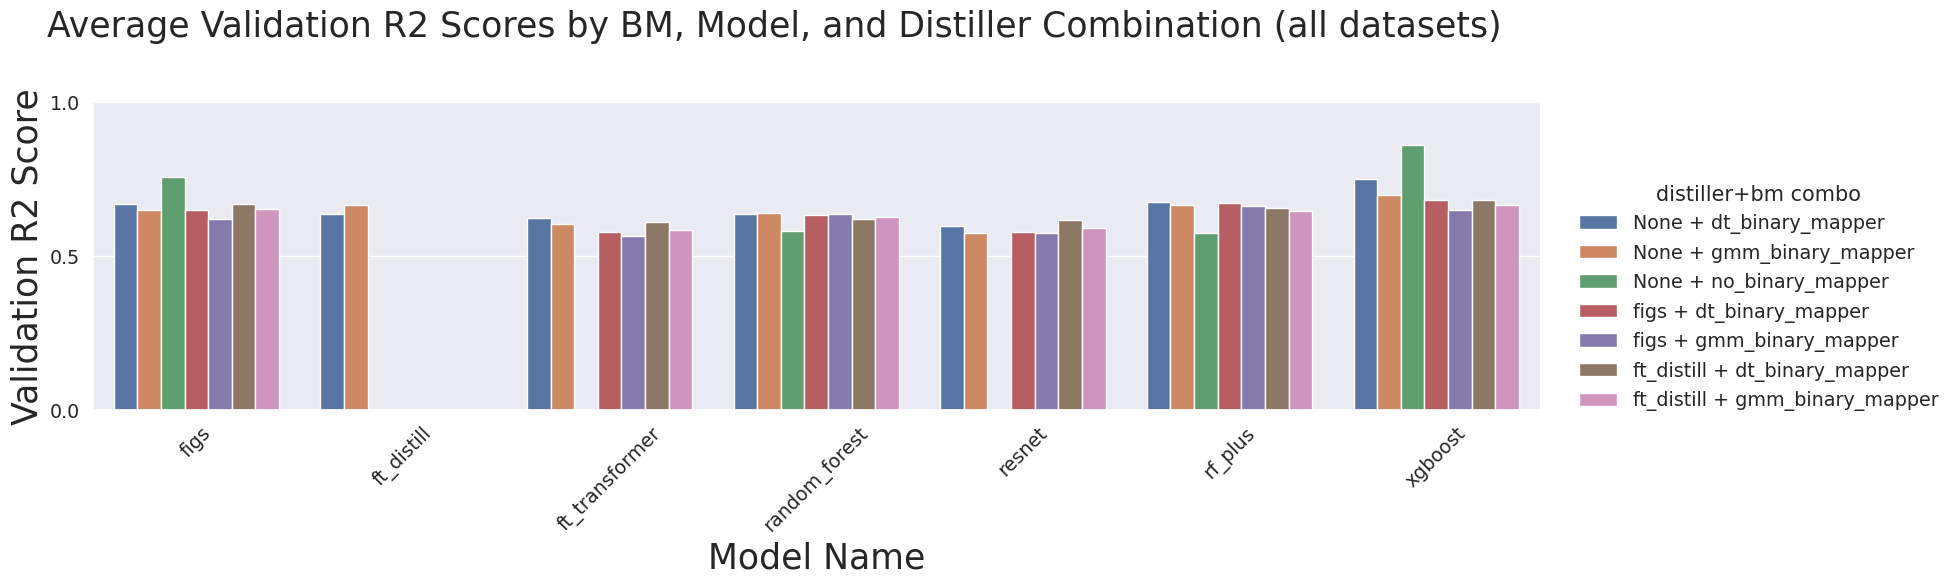

In [104]:
df = results.groupby(['model_name', 'distiller_name', 'binary_mapper_name'])['val_r2'].mean().reset_index() #.apply(lambda sdf: sdf.sort_values(by='val_r2', ascending=False).iloc[0,:])
df.loc[:, 'distiller+binary_mapper'] = df['distiller_name'] + ' + '+ df['binary_mapper_name'] #(df['distiller_name'] == 'None').map(lambda x: 'original_model' if x else '') + (df['distiller_name'] + " + " + df['binary_mapper_name'])*(df['distiller_name'] != 'None').to_numpy()
plot_histogram_for_dataset(df, 'all datasets')

In [ ]:
df = results.groupby(['dataset_name', 'model_name', 'distiller_name', 'binary_mapper_name'])[['train_r2']].apply(lambda sdf: sdf.sort_values(by='train_r2', ascending=False).iloc[0,:]).reset_index()
df = df.groupby(['model_name', 'distiller_name', 'binary_mapper_name'])['train_r2'].mean().reset_index() #.apply(lambda sdf: sdf.sort_values(by='val_r2', ascending=False).iloc[0,:])
df.loc[:, 'distiller+binary_mapper'] = df['distiller_name'] + ' + '+ df['binary_mapper_name'] #(df['distiller_name'] == 'None').map(lambda x: 'original_model' if x else '') + (df['distiller_name'] + " + " + df['binary_mapper_name'])*(df['distiller_name'] != 'None').to_numpy()
plot_histogram_for_dataset(df, 'all datasets')

/tmp/ipykernel_354593/3076742526.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cur_df = results[results['dataset_name'] == dn].groupby(['model_name', 'distiller_name', 'binary_mapper_name']).apply(lambda sdf: sdf.sort_values(by='train_r2', ascending=False).iloc[0,:])#.reset_index()
/tmp/ipykernel_354593/3076742526.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cur_df = results[results['dataset_na

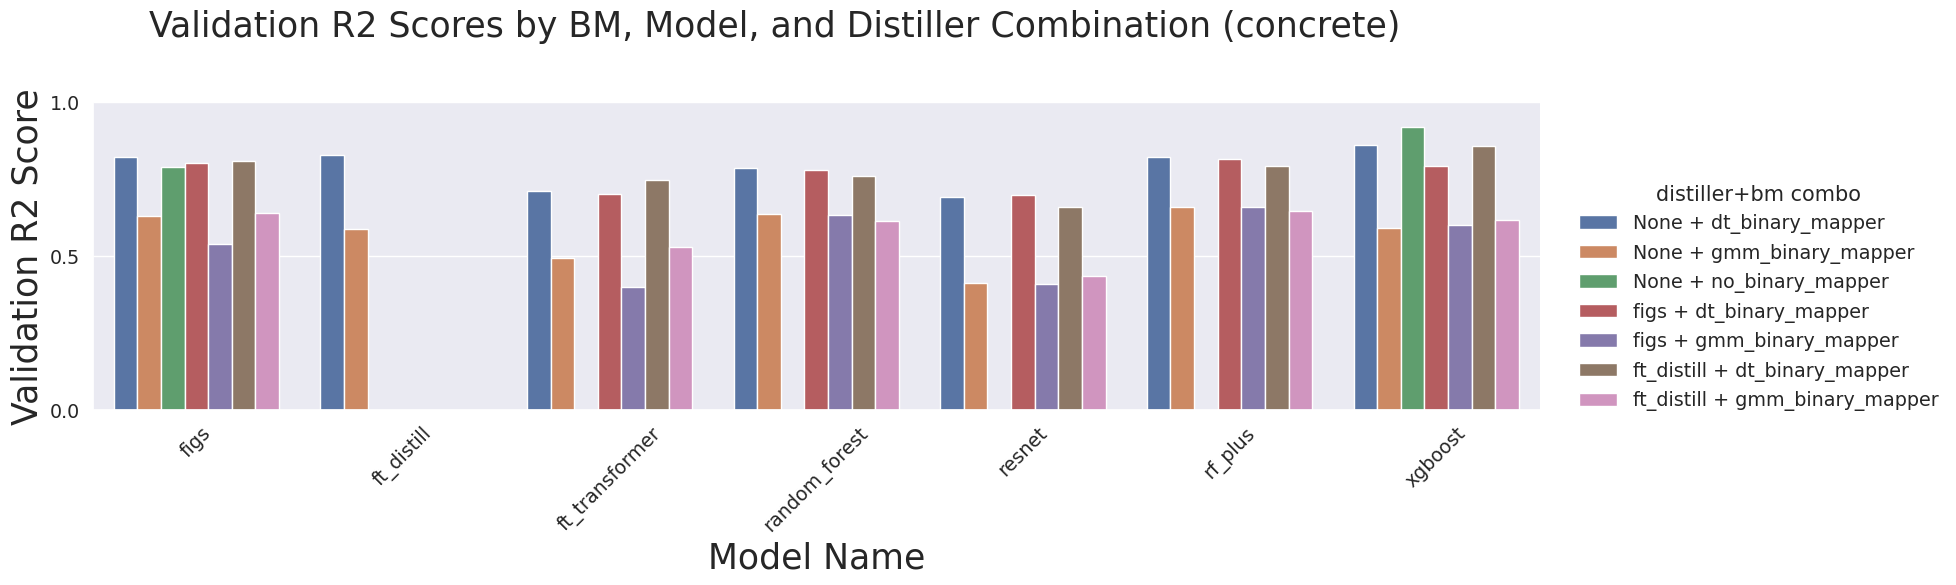

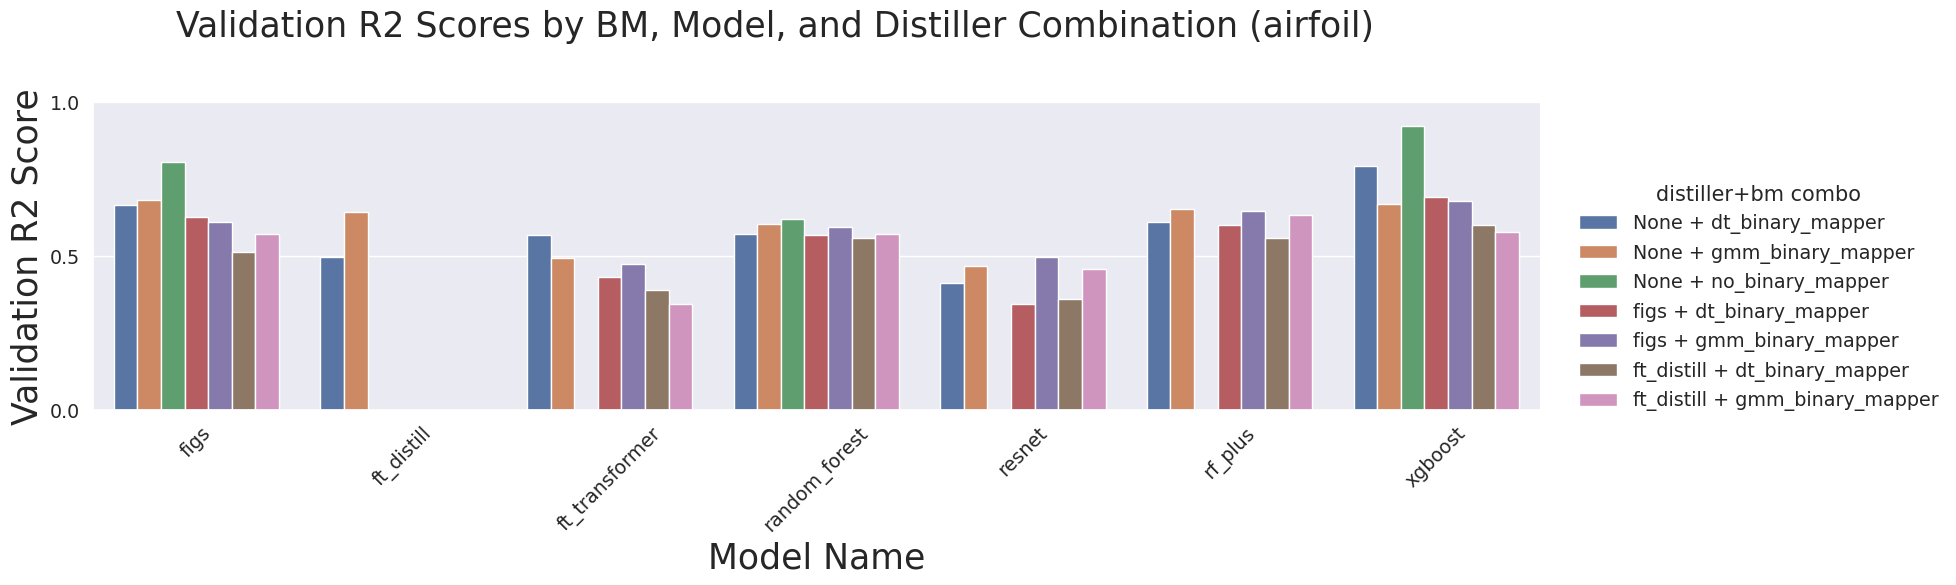

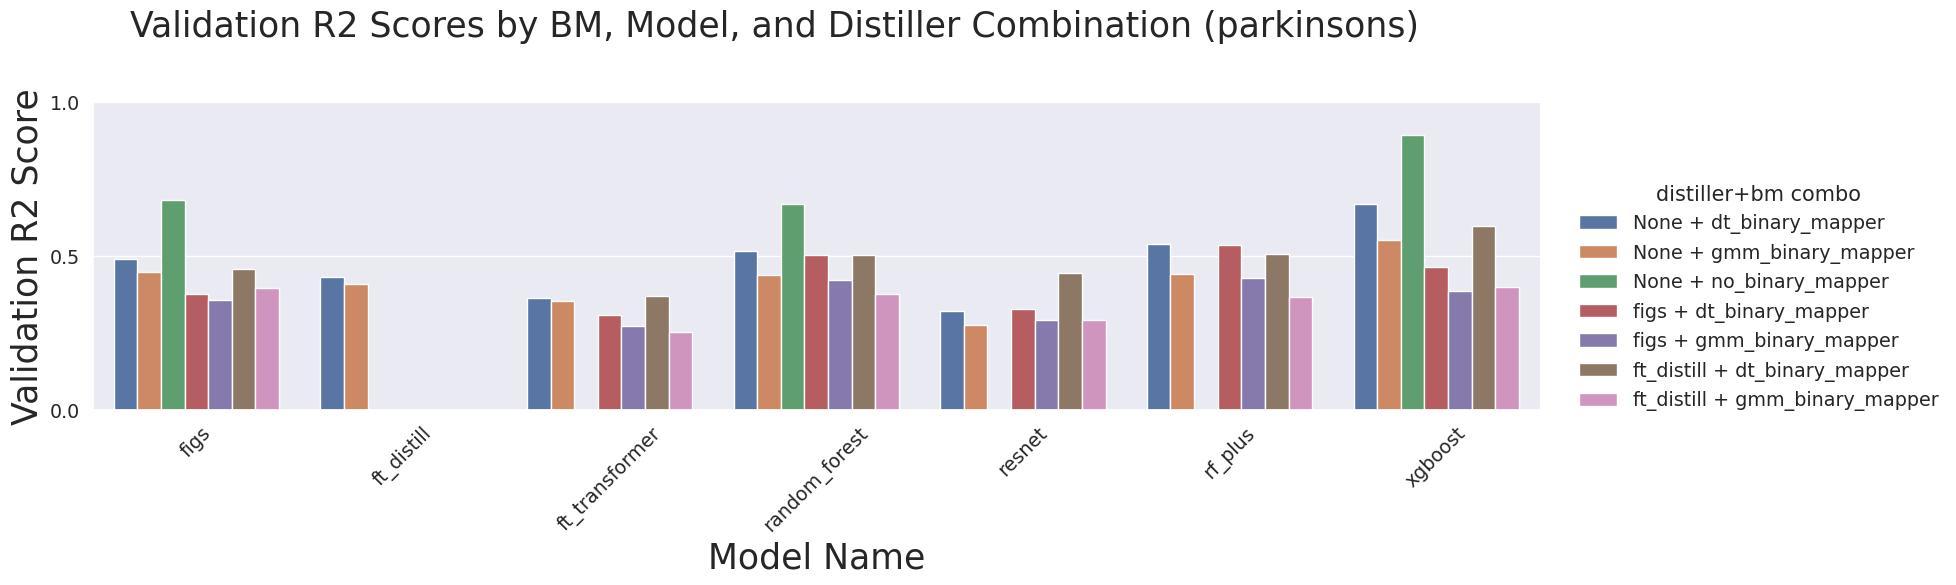

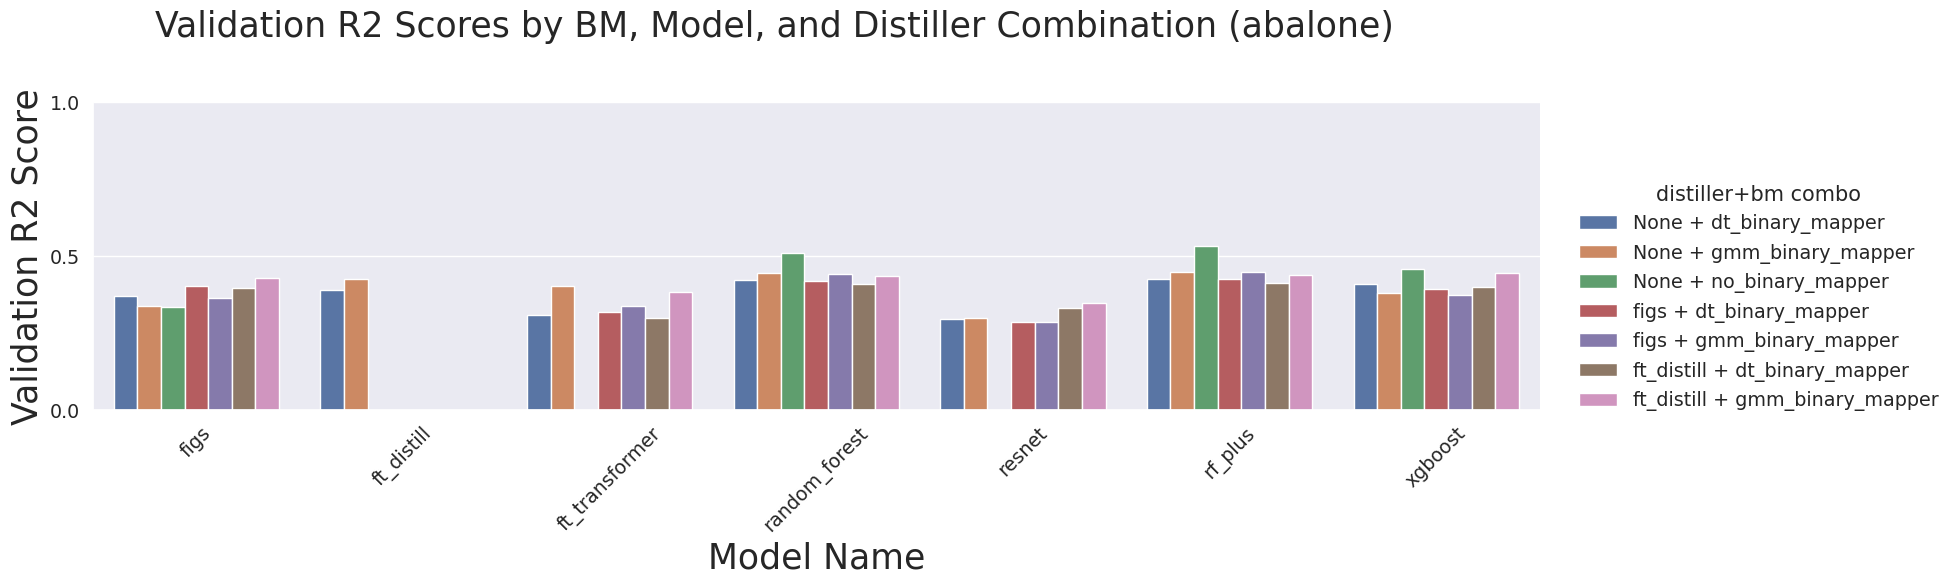

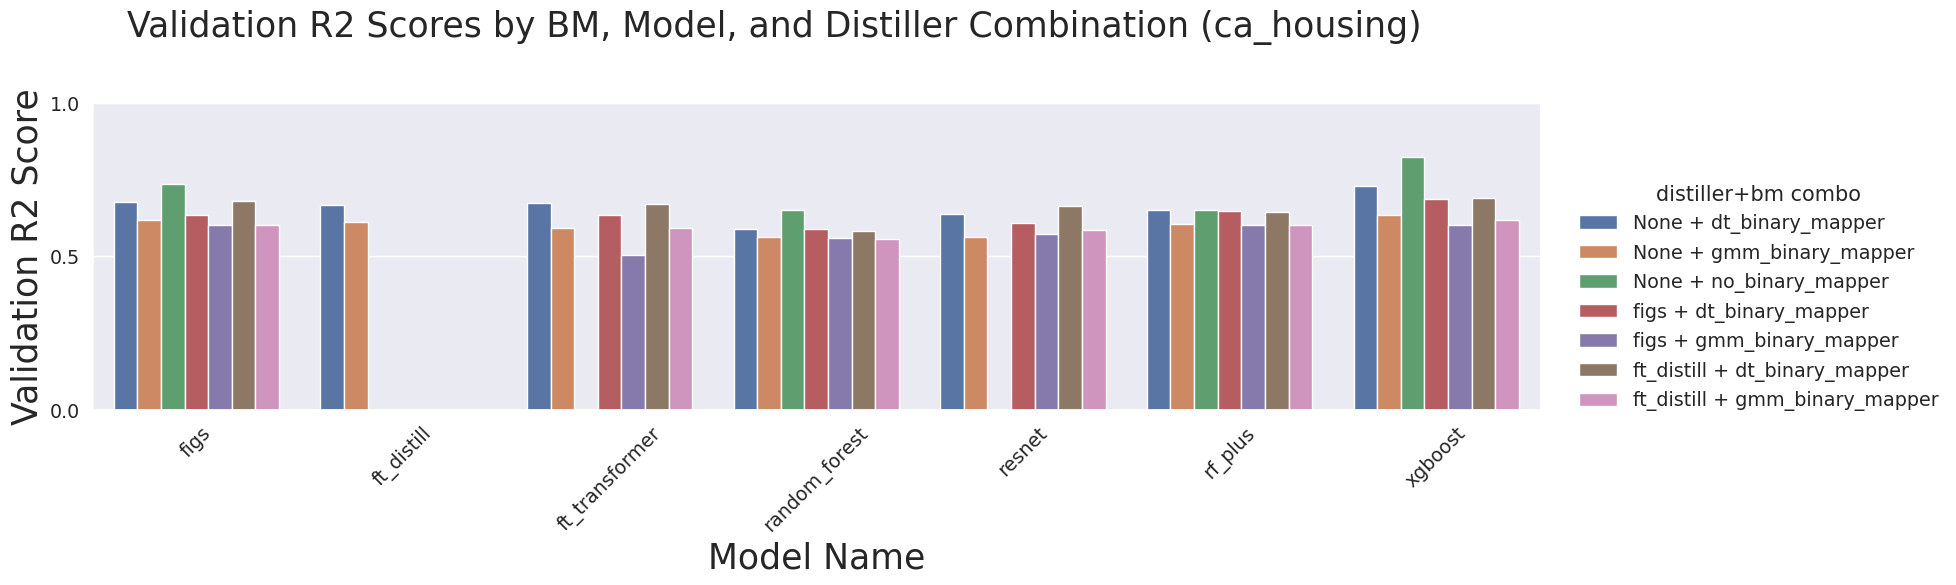

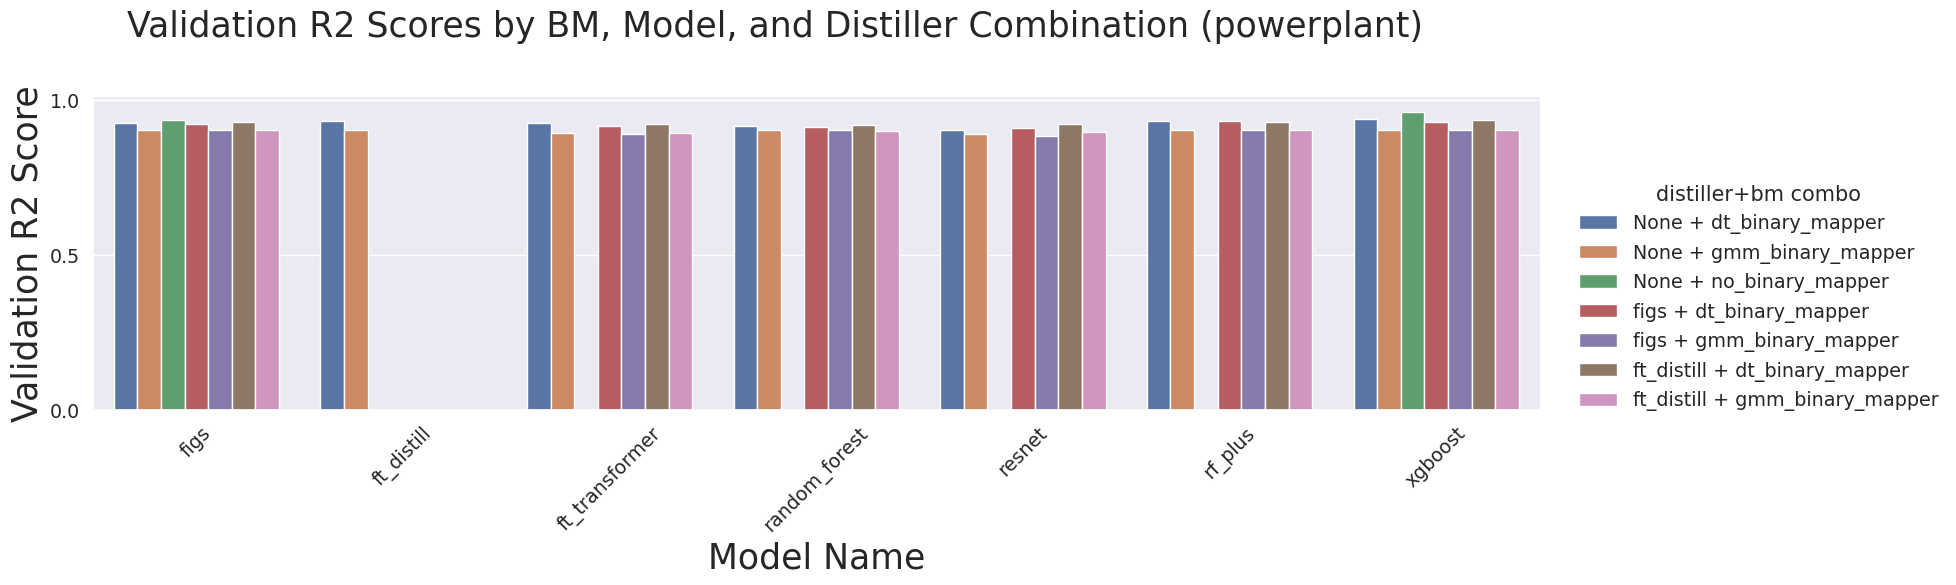

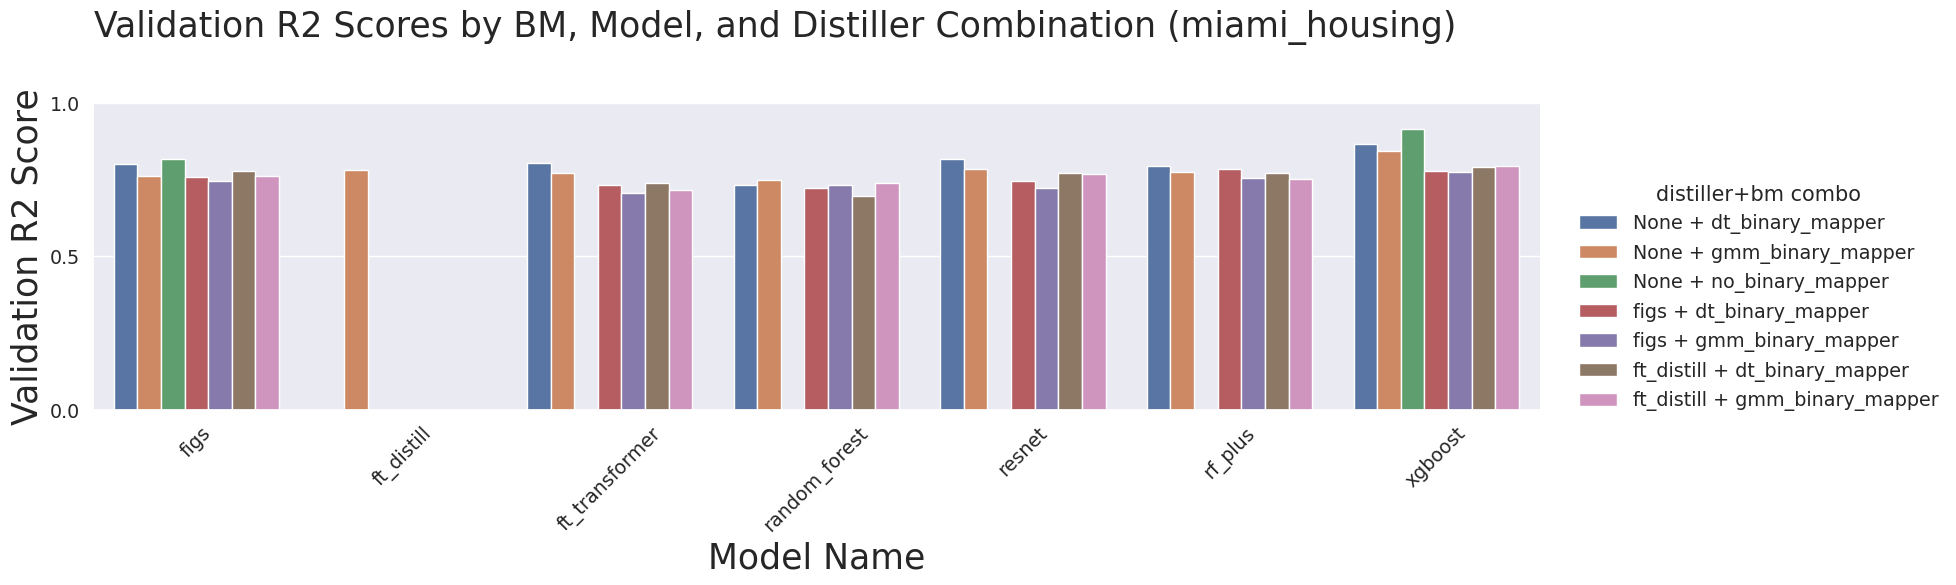

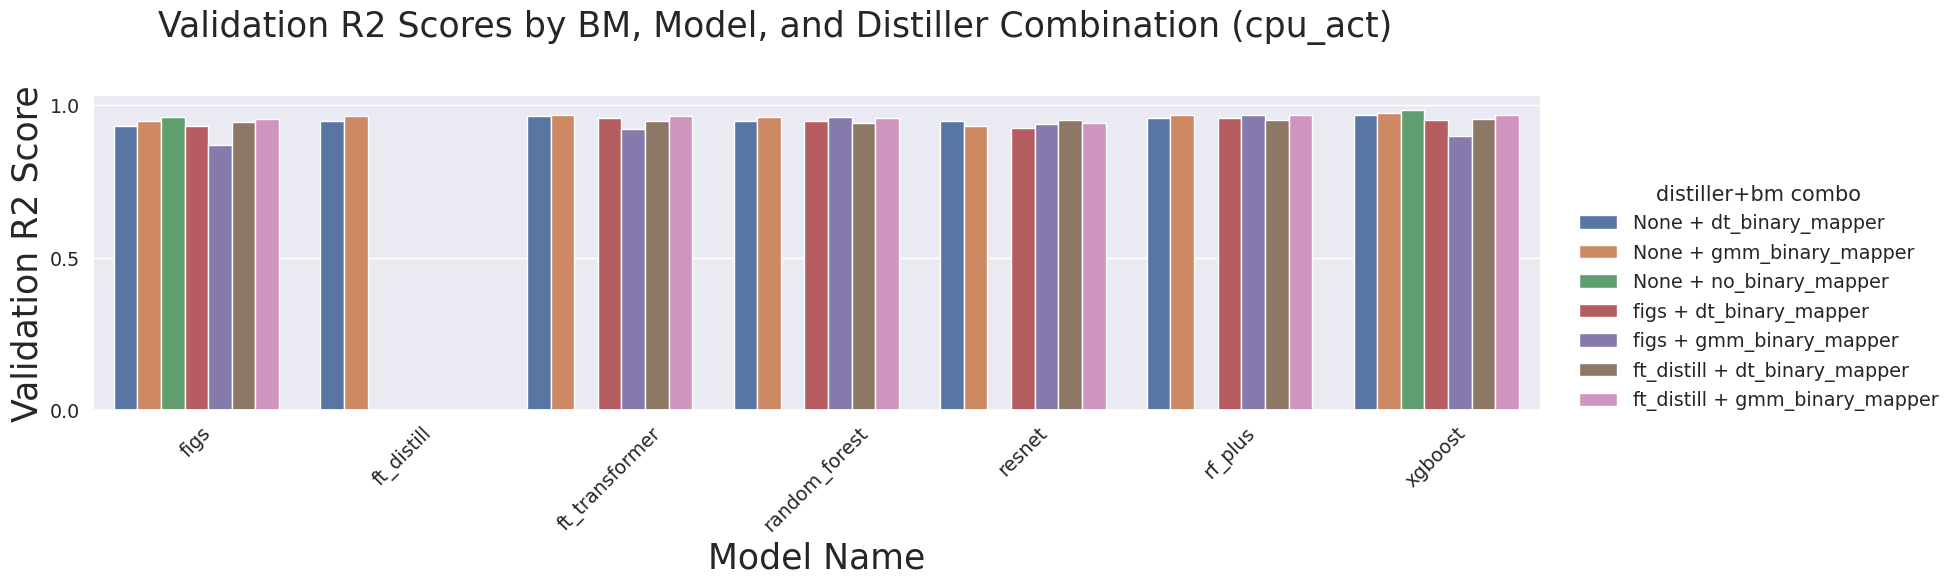

In [102]:
for dn in results['dataset_name'].unique():
    cur_df = results[results['dataset_name'] == dn].groupby(['model_name', 'distiller_name', 'binary_mapper_name']).apply(lambda sdf: sdf.sort_values(by='train_r2', ascending=False).iloc[0,:])#.reset_index()
    cur_df.loc[:, 'distiller+binary_mapper'] = cur_df['distiller_name'] + ' + '+ cur_df['binary_mapper_name']
    plot_histogram_for_dataset(cur_df, dn)

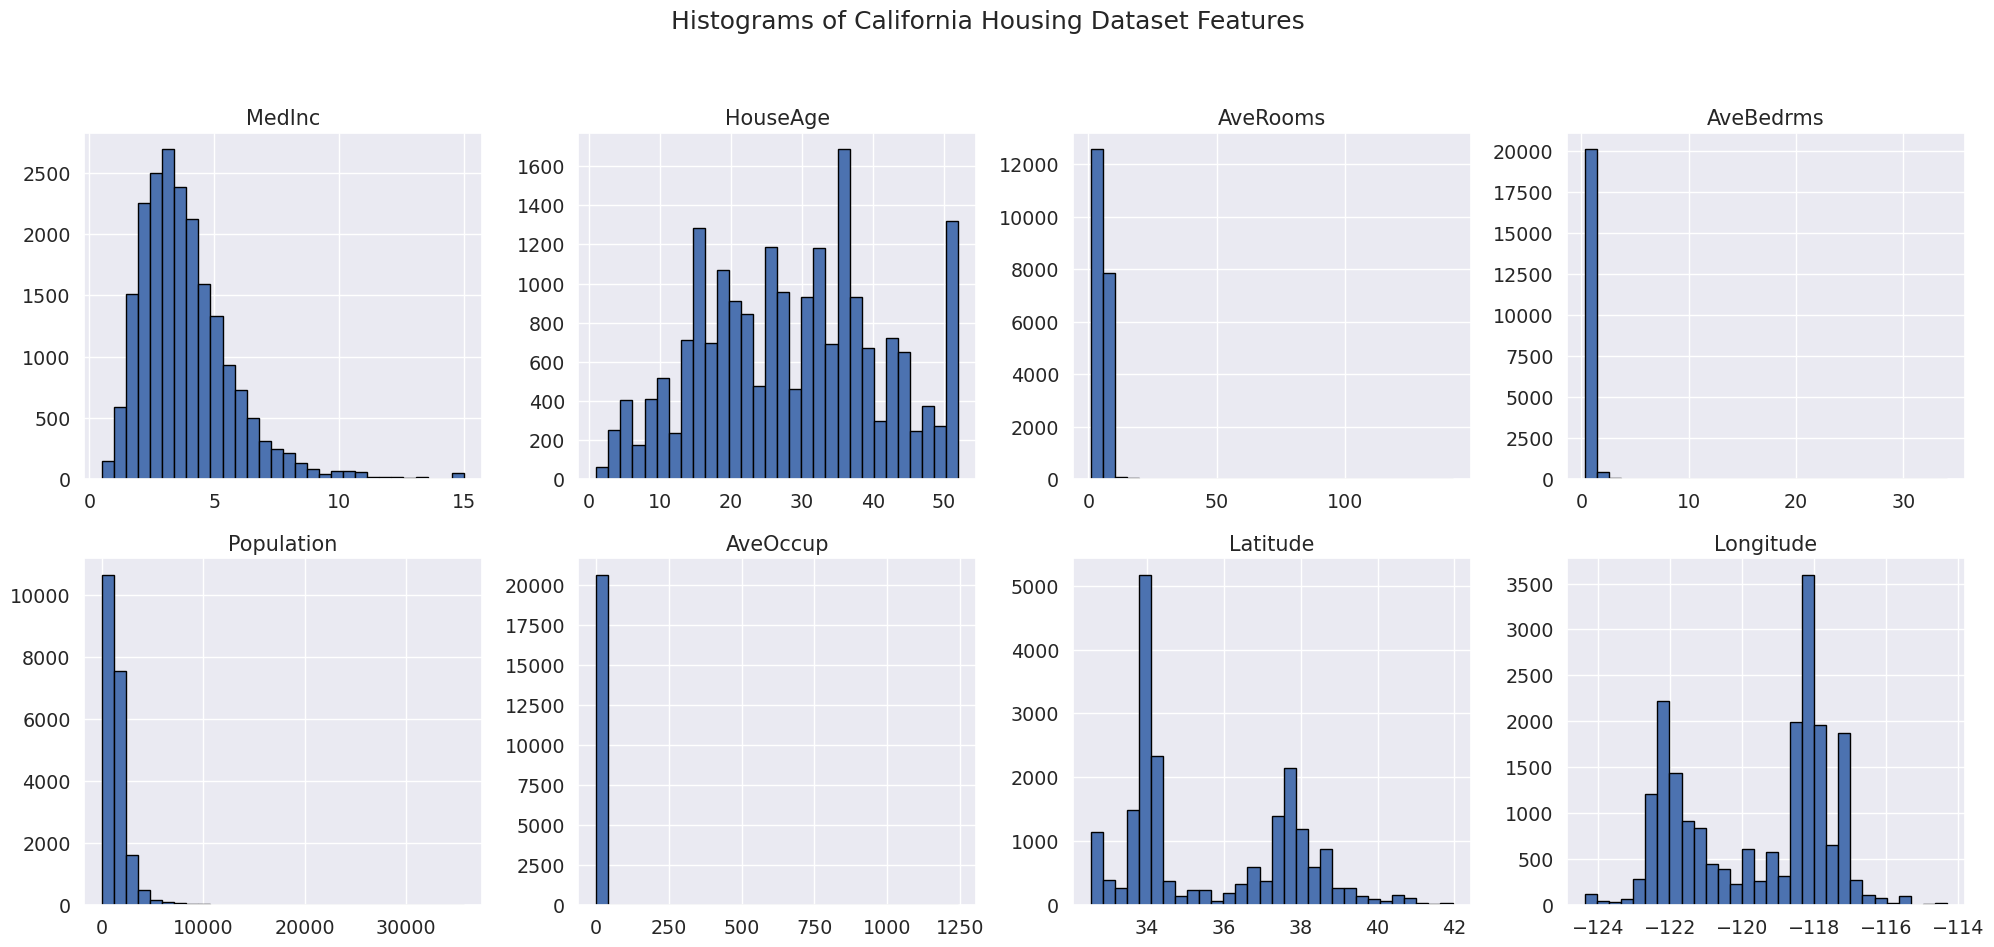

In [112]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data, y = fetch_california_housing(return_X_y = True,as_frame=True)
df = data#

# Create a 2x4 grid of histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Histograms of California Housing Dataset Features')

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=30, edgecolor='black')
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [109]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
